In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from ipywidgets import interactive
from IPython.display import display


def DOS(omega, Delta, h0, eta, sigma):
    def integrand(phi):
        return np.imag(
            (omega + sigma * h0 * np.cos(2 * phi))
            / np.sqrt(
                (1 - eta**2 * np.cos(2 * phi) ** 2) * Delta**2
                - (omega + sigma * h0 * np.cos(2 * phi)) ** 2
            )
        )

    integral, abserr = quad(integrand, 0, 2 * np.pi, limit=200)
    return integral


def calculate_DOS(omega_ax, h, eta, Gamma):
    dos_func = (
        lambda omega: 1
        / (4 * np.pi)
        * (
            DOS(omega + Gamma * 1j, 1, h, eta, +1)
            + DOS(omega + Gamma * 1j, 1, h, eta, -1)
        )
    )
    dos_values = [dos_func(omega_val) for omega_val in omega_ax]
    return np.array(dos_values)


def plot_DOS(h0, eta, Gamma):
    omega_ax = np.linspace(-4, 4, 501)
    dos = calculate_DOS(omega_ax, h0, eta, Gamma)

    plt.figure(figsize=(8, 6))
    plt.plot(omega_ax, dos)
    plt.xlabel(r"$\omega$")
    plt.ylabel(r"$n(\omega)$")
    plt.grid(True)
    plt.show()


# Use interactive to create sliders automatically
interactive_plot = interactive(
    plot_DOS, h0=(0, 1, 0.01), eta=(0, 1, 0.01), Gamma=(0.0001, 0.005, 0.0001)
)

# Display interactive plot
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='h0', max=1.0, step=0.01), FloatSlider(value=0.0, des…

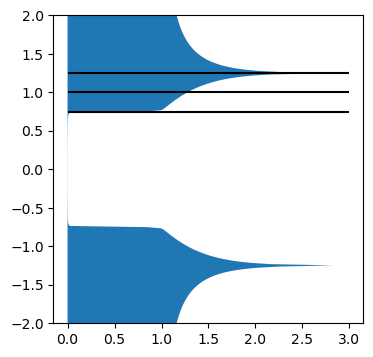

In [54]:
dos = calculate_DOS(omega_ax, 0.25, 0.005, 0.001)


fig, ax = plt.subplots(figsize=(4, 4))
ax.fill_betweenx(omega_ax, dos * 0, dos)
ax.hlines([1, 0.75, 1.25], 0, 3, colors="black")
ax.set_ylim(-2, 2)
fig.savefig("dos.svg")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from ipywidgets import interactive
from IPython.display import display


def DOS(omega, Delta, hz, h0, eta, sigma):
    def integrand(phi):
        return np.imag(
            (omega + sigma * (hz + h0 * np.cos(2 * phi)))
            / np.sqrt(
                (1 - eta**2 * np.cos(2 * phi) ** 2) * Delta**2
                - (omega + sigma * (hz + h0 * np.cos(2 * phi))) ** 2
            )
        )

    integral, abserr = quad(integrand, 0, 2 * np.pi, limit=200)
    return integral


def calculate_DOS(omega_ax, hz, h0, eta, Gamma):
    dos_func = (
        lambda omega: 1
        / (4 * np.pi)
        * (
            DOS(omega + Gamma * 1j, 1, hz, h0, eta, +1)
            + DOS(omega + Gamma * 1j, 1, hz, h0, eta, -1)
        )
    )
    dos_values = [dos_func(omega_val) for omega_val in omega_ax]
    return np.array(dos_values)


def plot_DOS(hz, h0, eta, Gamma):
    omega_ax = np.linspace(-4, 4, 501)
    dos = calculate_DOS(omega_ax, hz, h0, eta, Gamma)

    plt.figure(figsize=(8, 6))
    plt.plot(omega_ax, dos)
    plt.xlabel(r"$\omega$")
    plt.ylabel(r"$n(\omega)$")
    plt.grid(True)
    plt.show()


# Use interactive to create sliders automatically
interactive_plot = interactive(
    plot_DOS,
    hz=(0, 1, 0.01),
    h0=(0, 1, 0.01),
    eta=(0, 1, 0.01),
    Gamma=(0.0001, 0.005, 0.0001),
)

# Display interactive plot
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='hz', max=1.0, step=0.01), FloatSlider(value=0.0, des…